# Mapa

In [7]:
import plotly.graph_objects as go
import chart_studio.plotly as py
import chart_studio.tools as tls
import pandas as pd
import numpy as np
import datetime as datetime

In [8]:
def map_stat(table_file, html=None):
    
    # 
    tabla_coord_estados = '../misc/coord_estados_mexico.tsv'
    
    df = pd.read_csv(table_file,
                     sep='\t',
                     parse_dates=['fecha_inicio_sintomas', 'fecha_llegada_mx', 'fecha_caso_nuevo'])
    
    df['count'] = len(df) * [1]
    df = df[['estado', 'procedencia', 'fecha_caso_nuevo', 'count']]
    
    df_counts = df.groupby('estado').sum().reset_index()
    
    
    df_estados = pd.read_csv(tabla_coord_estados, sep='\t')
    
    df_map = df_counts.merge(df_estados, on='estado')
    
    countlog_list = []
    for num in df_map['count']:
        if num == 0:
            countlog = 0
        else:
            countlog = np.log(num)
        countlog_list.append(countlog)
        
    df_map['countlog'] = countlog_list
    df_map['text'] = df_map['abrev'] + '<br>' + df_map['count'].astype(str)
    
    recent_day = sorted(df['fecha_caso_nuevo'].value_counts().index)[-1].strftime('%Y-%m-%d')
    
    # Map
    fig = go.Figure()

    fig.add_trace(go.Scattergeo(
        lon = df_map['long'],
        lat = df_map['lat'],
        hoverinfo = 'text',
        text = df_map['text'],
        mode = 'markers',
        marker = dict(
            size = df_map['countlog'],
            color = 'rgb(255, 0, 0)',
            line = dict(
                width = 3,
                color = 'rgba(68, 68, 68, 0)'
            )
        )))

    fig.update_layout(
         title={'text': '<b>covid19</b>: casos confirmados   <i>{}</i>'.format(recent_day),
                'x': 0.03,
                'y': 0.02},
        showlegend = False,
        height=500, margin={"r":0,"t":30,"l":0,"b":30},
        geo = dict(
            scope = 'world',
            projection_type = 'natural earth',
            showcountries = True,
            landcolor = 'rgb(243, 243, 243)',
            #fitbounds="locations",
            countrycolor = 'rgb(204, 204, 204)',
            lataxis_range=[14,34],
            lonaxis_range=[-127, -76],
        ),
        width=1000
    )

    fig.show()
    
    fig.write_html(html)
    
    return df_map, fig

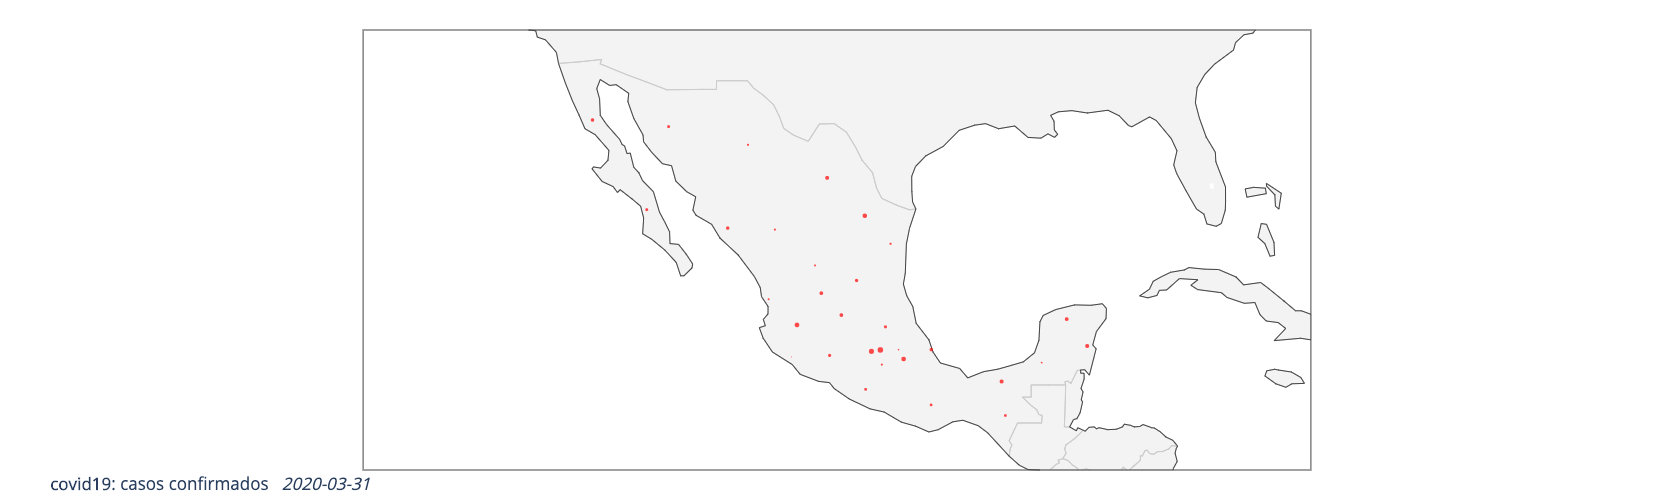

In [9]:
df_map, fig = map_stat('../datos/tablas_procesadas/tabla_completa.tsv', html='../figuras/map_20200331.html')

In [10]:
plotly_url = py.plot(fig, filename = '20200331_staticmap', auto_open=True)

In [11]:
df_map.to_csv('../datos/tablas_procesadas/20200331_mapa.tsv',
              sep='\t',
              index=None)